In [1]:
class Position:
    def __init__(self, x : float = 0, y : float = 0, z : float = 0, vect : tuple = ()):
        if len(vect) == 3:
            self.x = vect[0]
            self.y = vect[1]
            self.z = vect[2]
        else:
            self.x = x
            self.y = y
            self.z = z

    def __getitem__(self, item):
        return [self.x, self.y, self.z][item]
    
    def __repr__(self):
        return f"Vector({self.x}, {self.y}, {self.z})"

    def __str__(self):
        return f"{self.x}i + {self.y}j + {self.z}k"

    def __add__(self, other):
        return Position( vect = tuple(self[i] + other[i] for i in range(3)) )
    
    def __subtract__(self, other):
        return Position( vect = tuple(self[i] - other[i] for i in range(3)) )
    
    @staticmethod
    def zero():
        return Position()


In [2]:
print(Position(1, 13, 22) + Position(2, 15, -6))

3i + 28j + 16k


In [3]:
#class Quat:
#    def __init__(self, )

In [4]:
class Transform:
    def __init__(self, p : Position, v : Position):
        self.position = p
        self.velocity = v

    def __str__(self):
        return f"Position: {str(self.position)} Velocity: {str(self.velocity)}"
    
    def add_velocity(self, other : Position):
        self.velocity += other
        return self.velocity

    @staticmethod
    def empty():
        return Transform(Position(), Position())

In [5]:
class body:
    def __init__(self, T : Transform, mass : float = 1):
        self.transform = T
        self.mass = (mass if mass > 0 else 1)

        self.useGravity = True
        self.attractOther = True
        self.isAttracted = True

    @staticmethod
    def empty():
        return body(Transform.empty())


In [6]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

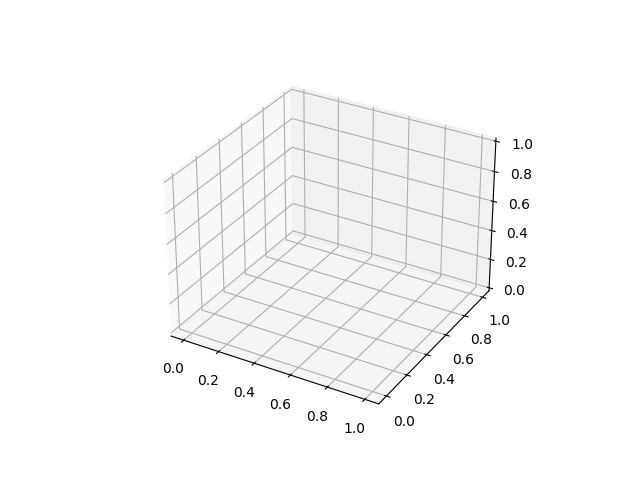

In [7]:
fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.scatter([], [], [])

In [8]:
frame_count = 0

def init():
    ax.scatter([], [], [])
    
    ax.set_xlim(-50, 50)
    ax.set_ylim(-50, 50)
    ax.set_zlim(-50, 50)

    global frame_count
    frame_count = 0
    

def upd(frame):
    ax.clear()
    
    global frame_count
    ax.set_title(str(frame_count))
    frame_count += 1
    
    ax.scatter(np.random.randint(-50, 50), np.random.randint(-50, 50), np.random.randint(-50, 50))
    ax.scatter(frame_count/2, frame_count/2, frame_count/2)
    
    ax.set_xlim(-50, 50)
    ax.set_ylim(-50, 50)
    ax.set_zlim(-50, 50)

anim = FuncAnimation(fig, upd, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)

In [9]:
anim.frame_seq = anim.new_frame_seq() 
anim.event_source.start()